In [11]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For finding na values
import missingno as msno

# Make it so more values of the DataFrames and Series are visable
from IPython.display import display

# Assuming your series is named 'series_data'
# Set the maximum number of displayed rows and columns to None to display all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv("owid-covid-data.csv", low_memory=False)
df

,iso_code,continent,location,date,total_cases,...,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,...,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,...,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,...,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,...,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,...,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
376879,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,...,16320539.0,NaN,NaN,NaN,NaN
376880,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,...,16320539.0,NaN,NaN,NaN,NaN
376881,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,...,16320539.0,NaN,NaN,NaN,NaN
376882,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,...,16320539.0,NaN,NaN,NaN,NaN


## Missing Data Analysis

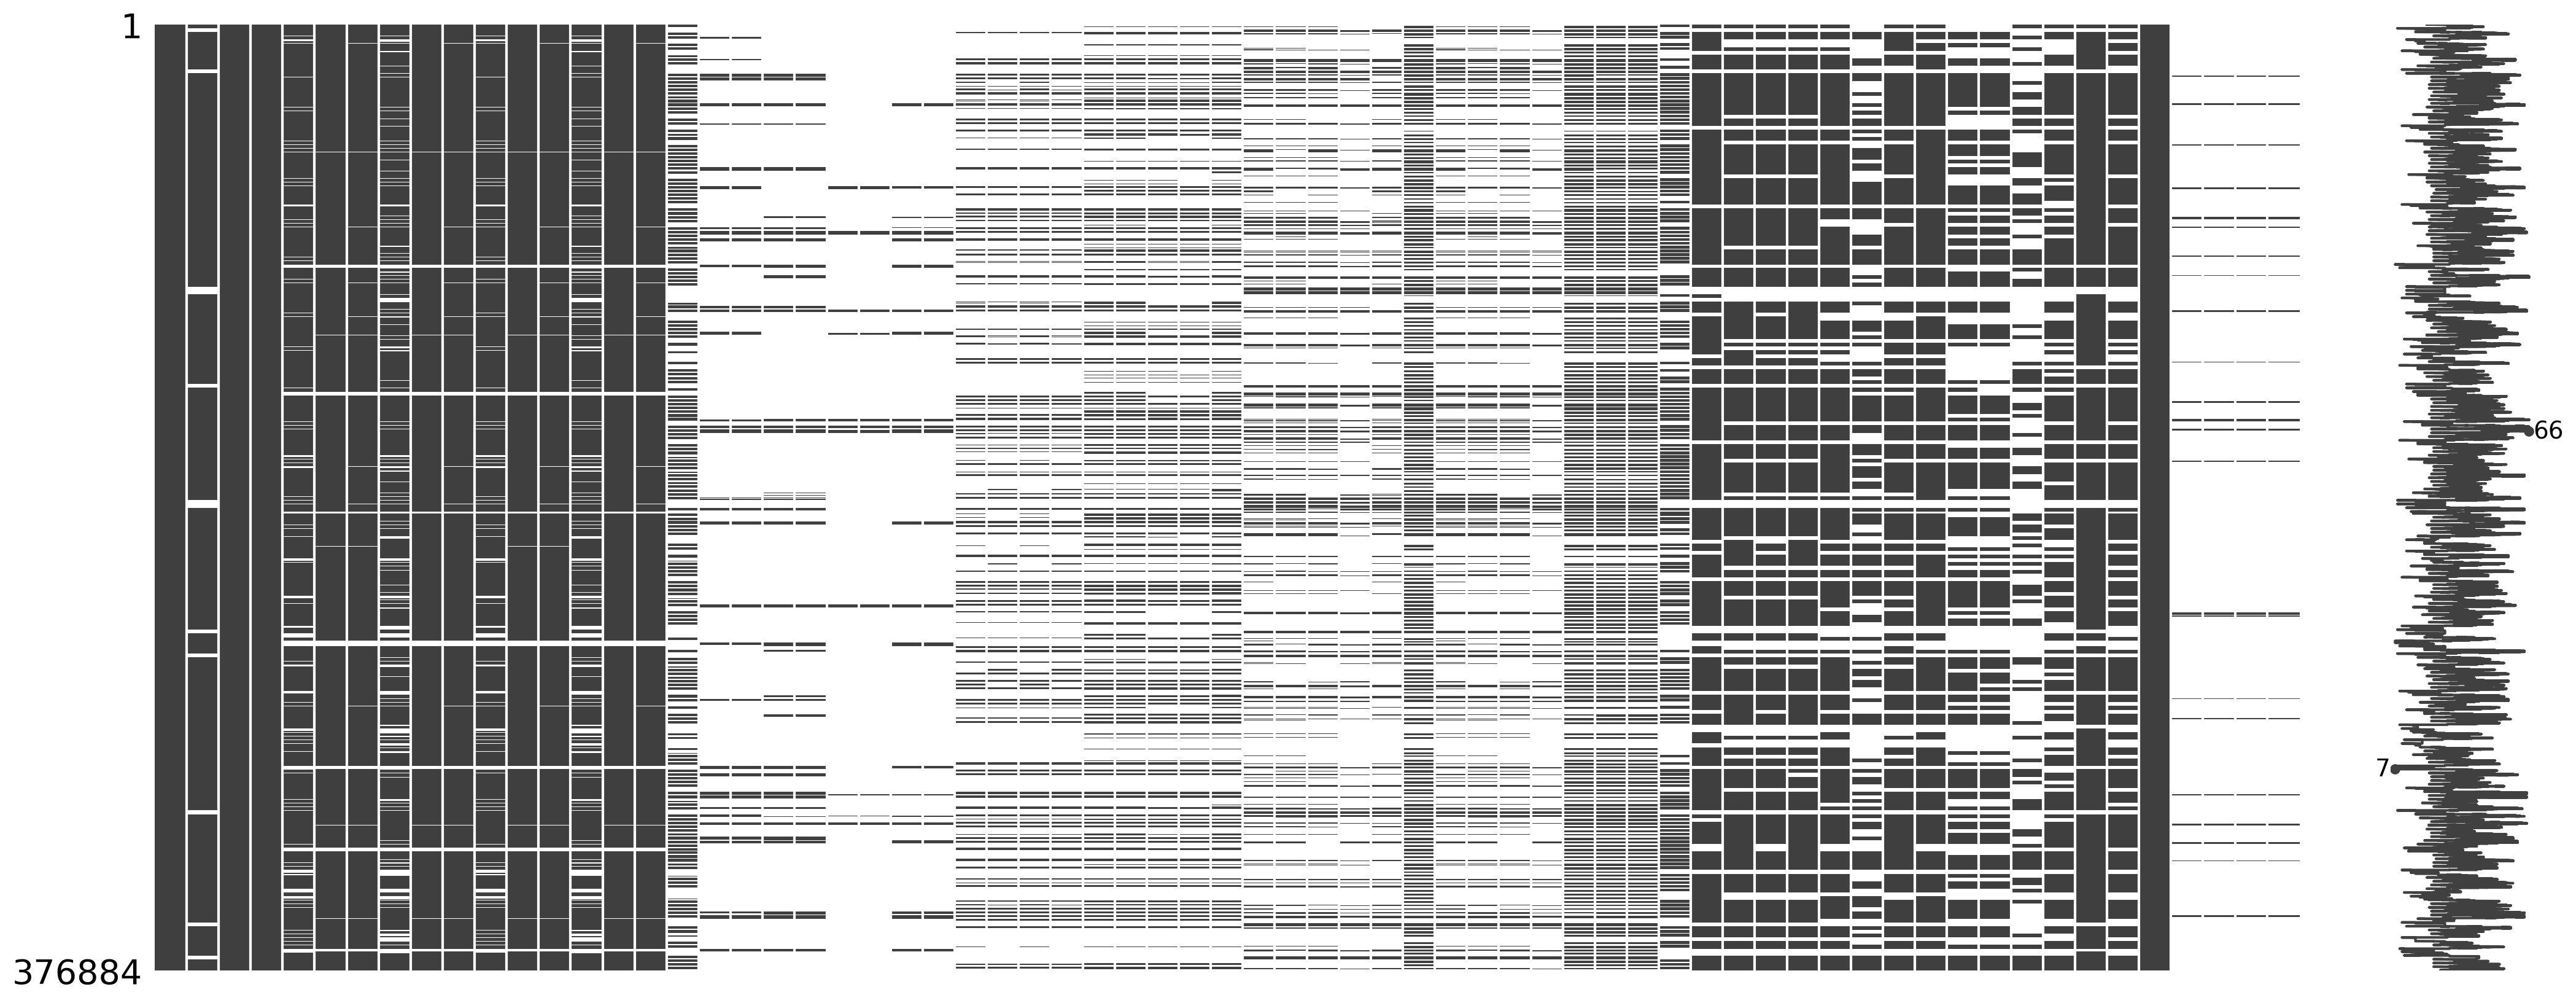

In [4]:
msno.matrix(df);

In [ ]:
df.columns

In [ ]:
msno.bar(df);

In [ ]:
msno.heatmap(df);

In [ ]:
sns.set(rc={'figure.figsize':(15,60)})
sns.countplot(df, y='location');

In [ ]:
df['new_cases']

In [ ]:
sns.set(rc={'figure.figsize':(10,8)});
sns.lineplot(data=df, x="date", y="new_cases");

## United States Subsection

In [ ]:
df_us = df[df['location']=='United States']
df_us

In [ ]:
sns.set(rc={'figure.figsize':(8,5)});
sns.lineplot(data=df_us, x="date", y="new_deaths_smoothed");

## Graph of Deaths

In [ ]:
def death_graph(country):
    df_new = df[df['location'] == country]
    sns.set(rc={'figure.figsize':(8,5)});
    sns.lineplot(data=df_new, x="date", y="new_deaths_smoothed");

In [ ]:
death_graph('Sweden')

# Function Research

In [ ]:
np.set_printoptions(threshold=np.inf)
df['date'].unique()

In [ ]:
date_one = '2020-03-16'
df_date_one = df[df['date'] == date_one]
df_date_one

In [ ]:
df.columns

# Function to get all the values from a date

In [5]:
def clean_data_for_date(df, date):
    """
    Cleans the DataFrame by finding the data from a specified date, indexing by the location 
    and selecting only certain columns
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    date (string): Formatted like YYYY-MM-DD.
    
    Returns:
    pd.DataFrame: Cleaned up DataFrame.
    """
    df = df[df['date'] == date]
    df = df.set_index('location')[
        [
            'total_cases_per_million', 
            'total_deaths_per_million', 
            'reproduction_rate', 
            'icu_patients_per_million', 
            'hosp_patients_per_million',
            'total_tests_per_thousand',
            'new_tests_per_thousand',
            'positive_rate',
            'tests_per_case',
            'total_vaccinations_per_hundred',
            'people_vaccinated_per_hundred',
            'people_fully_vaccinated_per_hundred',
            'total_boosters_per_hundred',
            'stringency_index',
            'population_density',
            'extreme_poverty',
            'cardiovasc_death_rate',
            'handwashing_facilities',
            'hospital_beds_per_thousand',
            'life_expectancy',
            'human_development_index',
            'population'
        ]
    ]
    df = df.drop('World')
    return df[df.isna().sum(axis=1) <= 12]

In [6]:
df_loc = clean_data_for_date(df, '2020-07-01')
df_loc

,total_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
location,,,,,,,,,,,
Afghanistan,744.394,17.093,0.82,NaN,NaN,...,37.746,0.50,64.83,0.511,41128772.0
Albania,798.292,17.943,1.18,NaN,NaN,...,NaN,2.89,78.57,0.795,2842318.0
Algeria,288.799,19.598,1.47,NaN,NaN,...,83.741,1.90,76.88,0.748,44903228.0
Angola,7.278,0.281,1.31,NaN,NaN,...,26.664,NaN,61.15,0.581,35588996.0
Argentina,1613.810,76.906,1.17,12.656,NaN,...,NaN,5.00,76.67,0.845,45510324.0
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,168.859,1.449,1.28,NaN,NaN,...,NaN,0.80,72.06,0.711,28301700.0
Vietnam,3.616,NaN,0.34,NaN,NaN,...,85.847,2.60,75.40,0.704,98186856.0
Yemen,32.733,8.784,0.98,NaN,NaN,...,49.542,0.70,66.12,0.470,33696612.0


# Normalize Function

In [7]:
def normalize_columns(df):
    """
    Normalize each column in the DataFrame by dividing each value by the maximum value in that column.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: Normalized DataFrame.
    """
    max_values = df.max()  # Get maximum value for each column
    normalized_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        normalized_df[column] = df[column] / max_values[column]  # Normalize each column
        
    return normalized_df

In [9]:
def normalize_columns_zscore(df):
    """
    Normalize each column in the DataFrame by calculating the z-score.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: Normalized DataFrame.
    """
    normalized_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        normalized_df[column] = (df[column] - mean) / std  # Calculate z-score for each column
        
    return normalized_df

In [12]:
normalize_columns_zscore(df_loc)

,total_cases_per_million,total_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,population_density,extreme_poverty,cardiovasc_death_rate,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
location,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.305434,-0.347483,-0.625254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.871344,-0.235205,NaN,3.084466,-0.394791,-1.027744,-1.075983,-1.410510,-0.029876
Albania,-0.290543,-0.342040,0.425834,NaN,NaN,-0.589456,-0.453313,1.009453,-1.167095e-01,NaN,NaN,NaN,NaN,0.343062,-0.157418,-0.620716,0.450735,NaN,-0.023369,0.746703,0.451162,-0.271512
Algeria,-0.431303,-0.331442,1.272543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198797,-0.292369,-0.650285,0.218412,1.043935,-0.439407,0.522515,0.143069,-0.006054
Angola,-0.509079,-0.455140,0.805393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727597,-0.282282,NaN,0.197555,-0.741437,NaN,-1.564155,-0.951647,-0.064839
Argentina,-0.065238,0.035534,0.396637,0.231284,NaN,-0.563290,-0.370415,1.897900,-1.168945e-01,NaN,NaN,NaN,NaN,1.592153,-0.294175,-0.645357,-0.567046,NaN,0.863339,0.494657,0.778922,-0.002223
Armenia,1.937686,0.524158,-0.187301,NaN,NaN,-0.132598,-0.105882,2.242116,-1.169357e-01,NaN,NaN,NaN,NaN,NaN,-0.160409,-0.586217,0.781847,1.366183,0.527147,0.285062,0.326614,-0.271902
Australia,-0.430448,-0.430518,2.732386,-0.366146,-0.579659,0.628355,0.514529,-0.721857,-4.172342e-02,NaN,NaN,NaN,NaN,0.366934,-0.314181,-0.650285,-1.315711,NaN,0.375860,1.392735,1.427885,-0.124238
Austria,-0.068941,0.058094,1.214149,-0.327036,-0.445944,0.254930,-0.022985,NaN,NaN,NaN,NaN,NaN,NaN,-1.050294,-0.154522,-0.640429,-0.979409,NaN,1.859309,1.140689,1.283671,-0.233030
Azerbaijan,-0.101164,-0.341329,0.250652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.784680,-0.135156,NaN,2.749738,1.028295,0.737267,0.007812,0.195510,-0.224078


In [18]:
df_loc = df_loc.fillna(0)

# t-SNE Research

In [33]:
def plot_components(components,x='pc1',y='pc2'):
    '''
    2d scatter plot of dimensionality reductions with labelling

    inputs:
        components (pd.DataFrame) shape is (samples x components), index is sample names
        x (str) name of column in components to plot as x axis
        y (str) name of column in components to plot as y axis

    typically you might generate components like this
        pcs = PCA(n_components=2).fit_transform(daily_change)
        components = pd.DataFrame(pcs,columns=['pc1','pc2'])
        components.index = daily_change.index
    '''
    sns.set(rc={'figure.figsize':(15,25)});
    sns.scatterplot(data=components, x=x, y=y)
    sns.despine()
    ax = plt.gca()
    for company in components.index:
        ax.annotate(company,xy=components.loc[company])

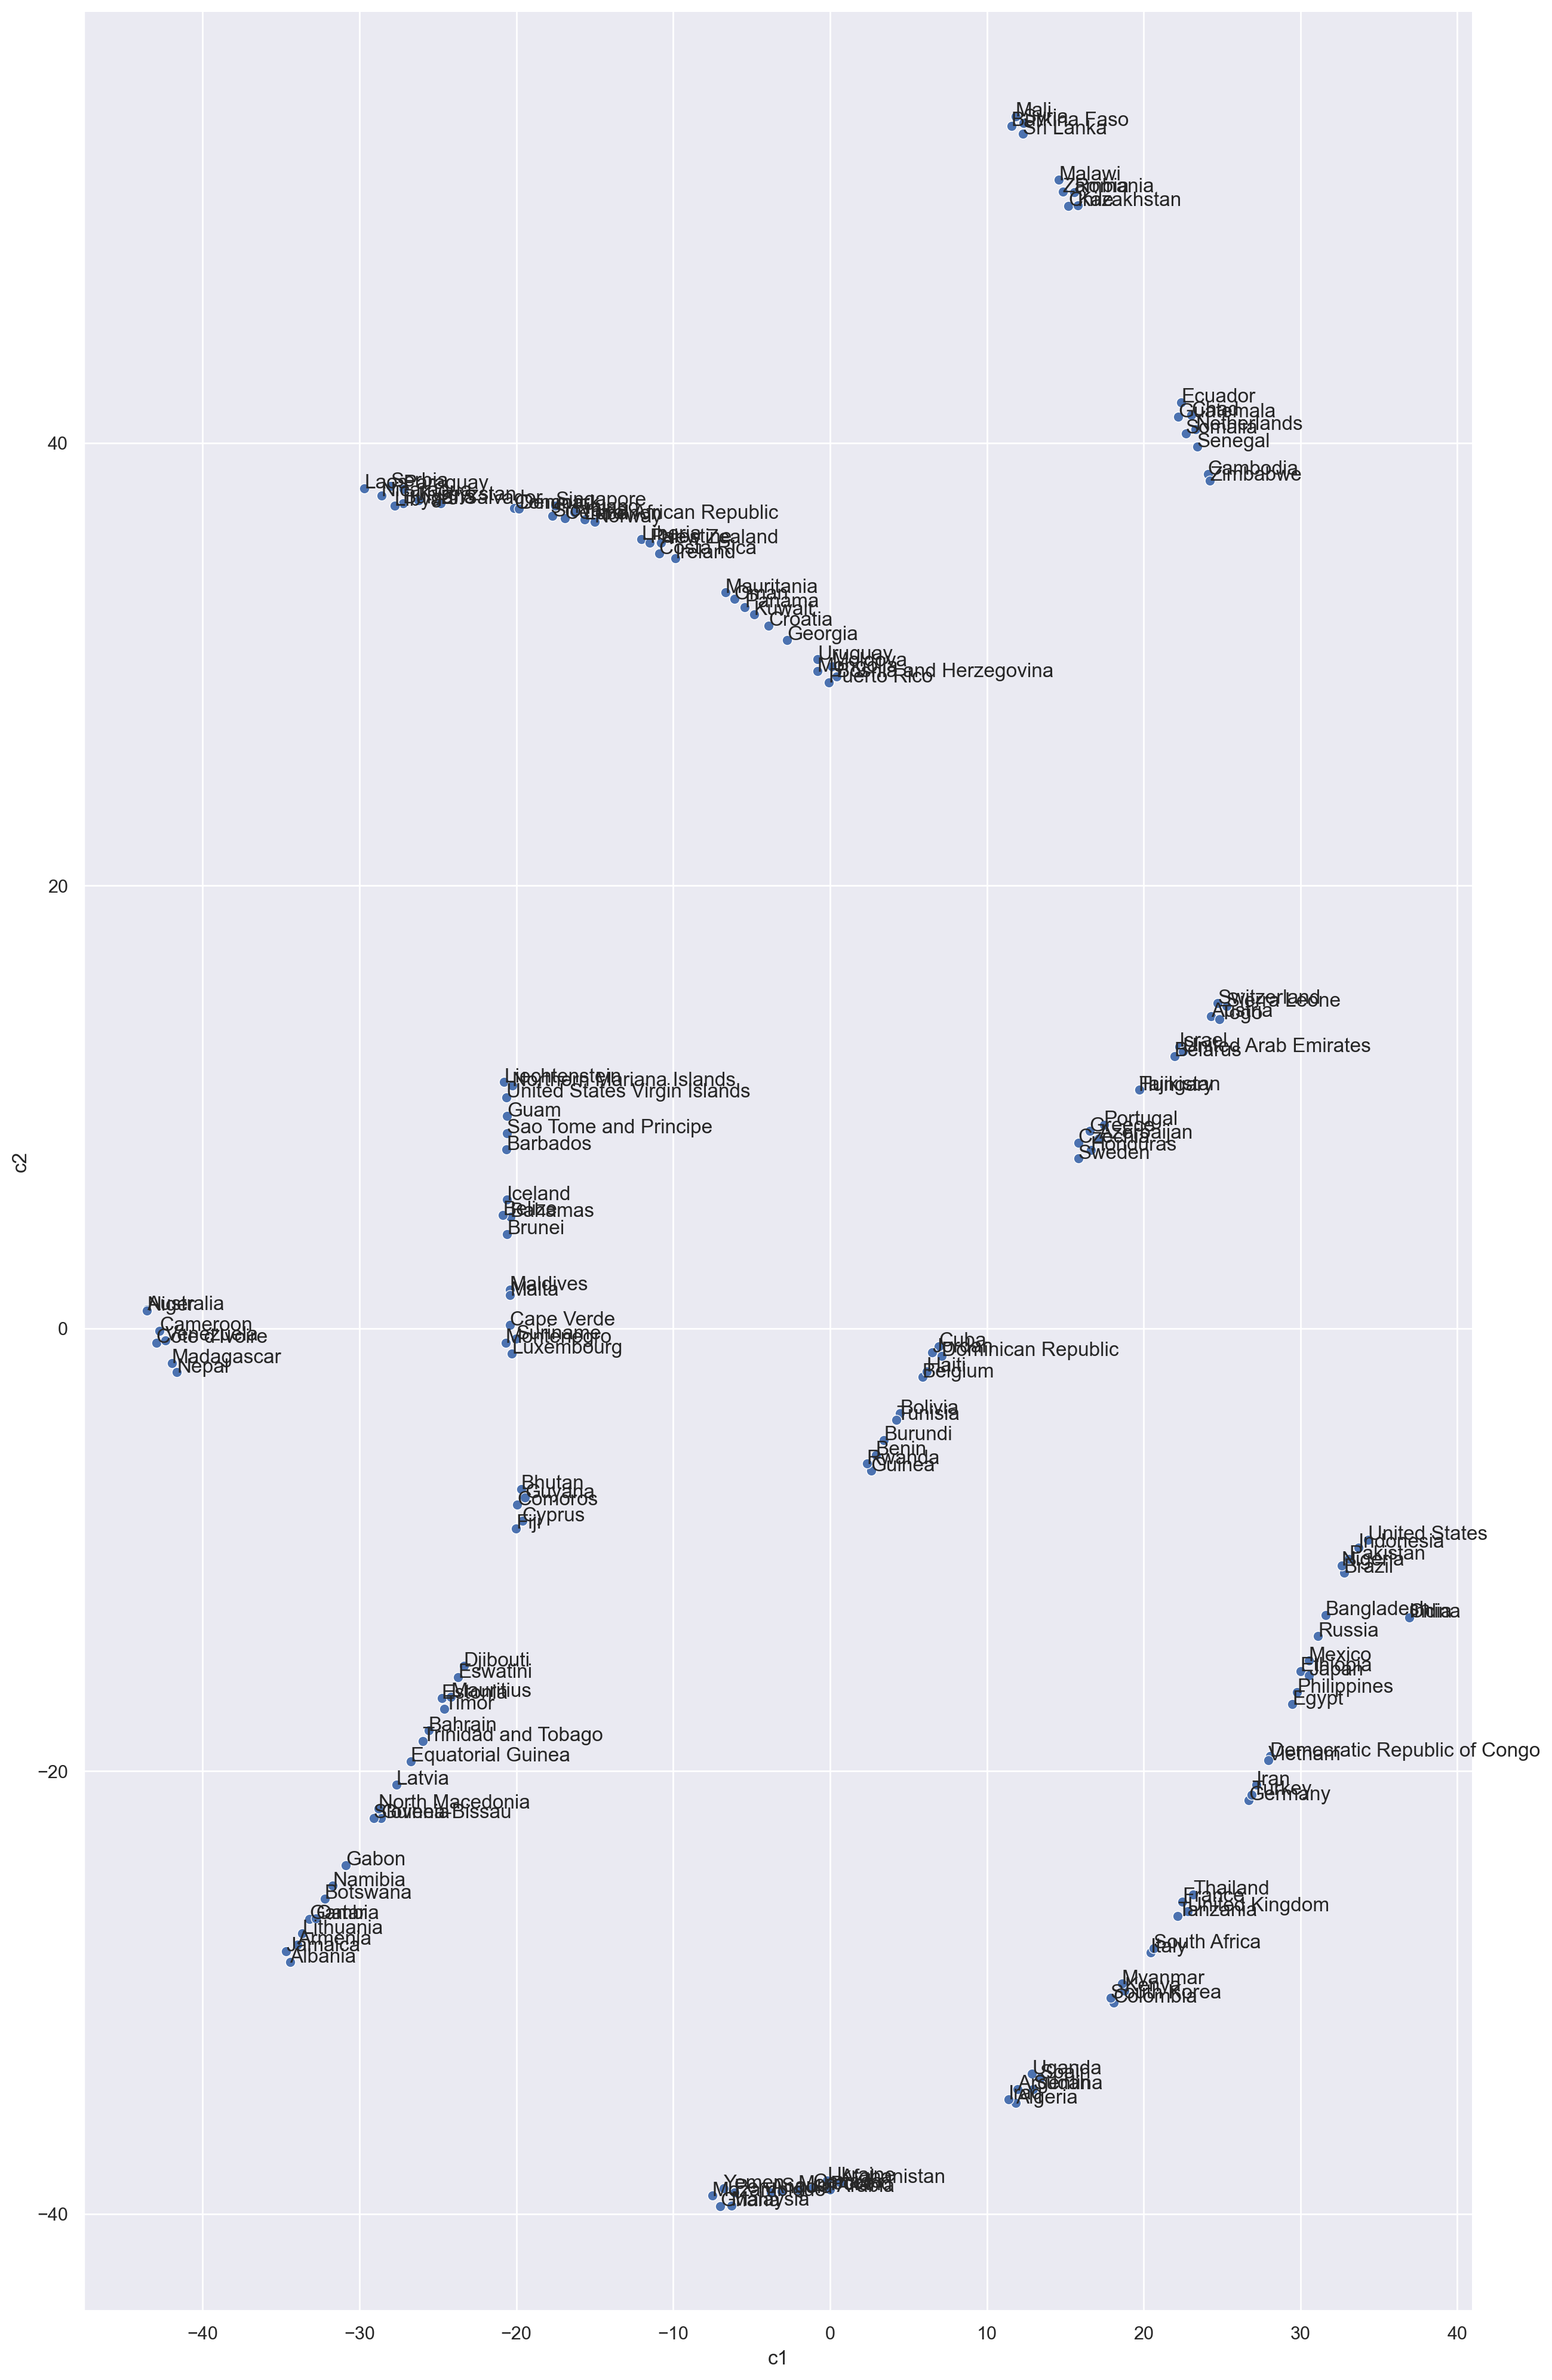

In [34]:
from sklearn.manifold import TSNE

tsne_perp_5 = TSNE(
    n_components=2, 
    learning_rate='auto', 
    init='random', 
    perplexity=5, 
    random_state=99
)

tcs = tsne_perp_5.fit_transform(df_loc)
# construct the data frame
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = df_loc.index

plot_components(tcs,'c1','c2')

In [ ]:
n_samples = 1500
random_state = 42
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
common_params = {
    "random_state": random_state,
}

In [ ]:
def plot_gmm(gmm, X, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Set3')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    
    if gmm.covariance_type=='diag':
        fullc = np.array([ np.diag(x) for x in gmm.covariances_])
    elif gmm.covariance_type=='spherical':
        fullc = np.array([ np.diag([x, x]) for x in gmm.covariances_])
    elif gmm.covariance_type=='tied':
        fullc = np.array( gmm.n_components*[gmm.covariances_])
    elif gmm.covariance_type=='full':
        fullc = gmm.covariances_
    else:
        raise NotImplemented
        
    for pos, covar, w in zip(gmm.means_, fullc, gmm.weights_):
        alph = np.max([w*w_factor, 0.05])
        draw_ellipse(pos, covar, ax=ax, alpha=alph)

In [ ]:
k = 3

# try all the the different covariance_types for GMM
cov = 'full' #your answers here


# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

plot_gmm( GaussianMixture(n_components=k-1, covariance_type=cov), df, ax=axs[0,0])
axs[0, 0].set_title("Non-optimal Number of Clusters")

# plot_gmm( GaussianMixture(n_components=k, covariance_type=cov, **common_params), X_aniso,  ax=axs[0,1])
# axs[0, 1].set_title("Anisotropically Distributed Blobs")

# plot_gmm( GaussianMixture(n_components=k, covariance_type=cov, **common_params), X_varied, ax=axs[1,0])
# axs[1, 0].set_title("Unequal Variance")

# plot_gmm( GaussianMixture(n_components=k, covariance_type=cov, **common_params), X_filtered, ax=axs[1,1])
# axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("GMM clusters").set_y(0.95)
plt.show()